In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# M = no.asarray()

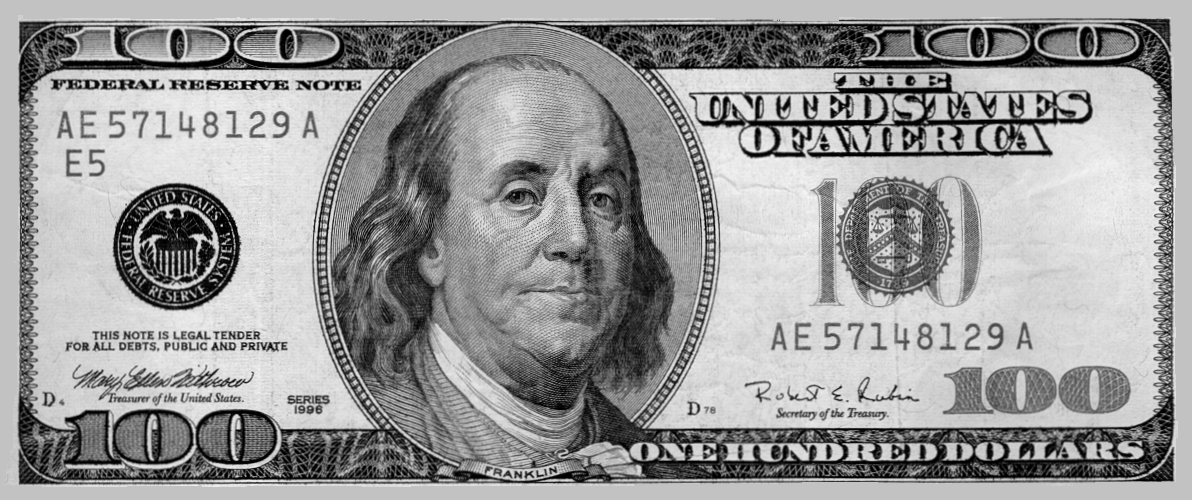

In [ ]:
gray_img = Image.open("/content/dollar.tif")
# plt.imshow(img, cmap='gray')  # Display in grayscale
# plt.axis('off')  # Turn off the axis
# plt.show()
gray_img


#Task 1

Write a function that takes a grayscale image as argument and generates the histogram of that grayscale image. You can use any suitable grayscale image from here: https://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

# **Description**
First a check is done to ensure that the image is grayscale otherwise we convert it accordingly. Then we convert the image to a numpy array in range of 0 to 255. Then a histogram is initialized with 0s. We flatten the image and count the pixel intensities to calculate the histogram. Finally it is normally plotted.  

In [ ]:
def my_histogram(gray_image):
  #implement this function
  # pil => rgb and cv2 => bgr
  if gray_image.mode != 'L':
      gray_image = gray_image.convert('L')

  image_array = np.array(gray_image)

  histogram = [0] * 256

  for pixel in image_array.flatten():
      histogram[pixel] += 1

  plt.figure()
  plt.title("Grayscale Image Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")
  plt.bar(range(256), histogram, color='gray')
  plt.show()

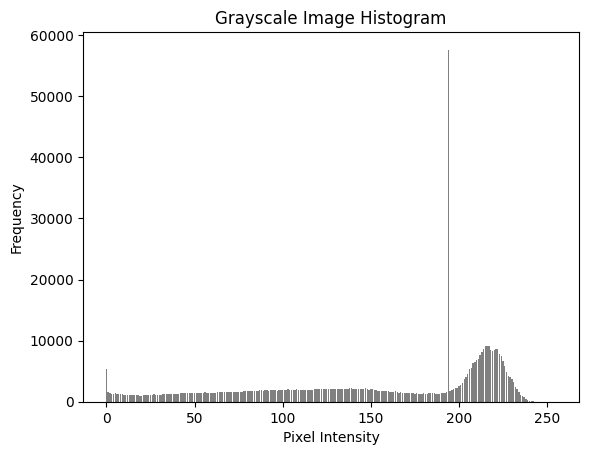

In [ ]:
my_histogram(gray_img)

# Task 2
Take any suitable color image and divide it into 3 separate channels. Display the individual channels in their own color. For example, the red channel should generate a red image, where the intensity of red in each pixel will depend on how much red is present in that pixel in the original color image

# **Description**
First the color mode is checked whether it is in RGB format otherwise need to convert it. The image is then split into 3 channels Red, Green and Blue. Three blank arrays is initialized with size same as each channel so that these arrays can be used to reconstruct images where only one color channel is visible, while the other channels are set to 0. Then each arrays are populated according to their colors. 0 for red, 1 for green and 2 for blue index is filled with the pixel values respectively. The arrays are converted back to image and plotted to display the channeled images.




In [ ]:
def channel_show(color_image):
  if color_image.mode != 'RGB':
      color_image = color_image.convert('RGB')

  r, g, b = color_image.split()

  r_img = np.zeros_like(np.array(color_image))
  g_img = np.zeros_like(np.array(color_image))
  b_img = np.zeros_like(np.array(color_image))

  r_img[..., 0] = np.array(r)
  g_img[..., 1] = np.array(g)
  b_img[..., 2] = np.array(b)

  r_image = Image.fromarray(r_img)
  g_image = Image.fromarray(g_img)
  b_image = Image.fromarray(b_img)

  plt.figure(figsize=(20, 10))

  plt.subplot(1, 4, 2)
  plt.title("Red Channel")
  plt.imshow(r_image)
  plt.axis('off')

  plt.subplot(1, 4, 3)
  plt.title("Green Channel")
  plt.imshow(g_image)
  plt.axis('off')

  plt.subplot(1, 4, 4)
  plt.title("Blue Channel")
  plt.imshow(b_image)
  plt.axis('off')

  plt.show()



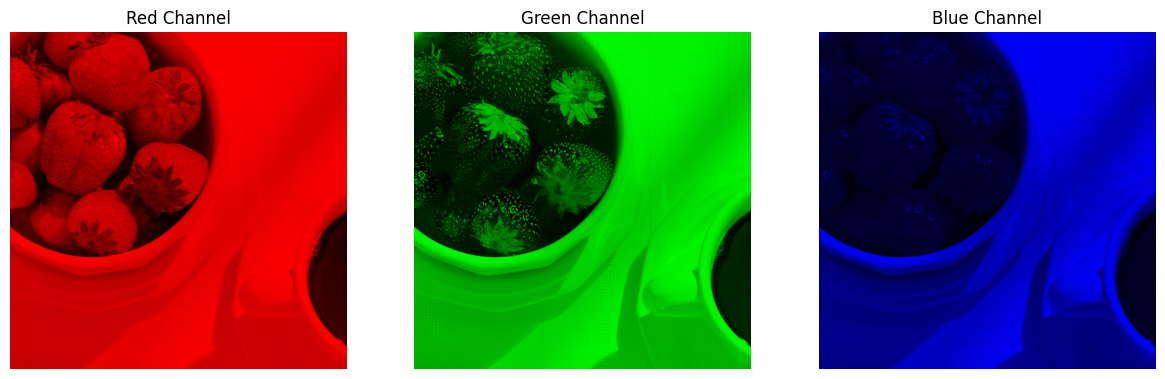

In [ ]:
color_img = Image.open("/content/strawberry.tif")
channel_show(color_img)

# Task 3

Use your previously written histogram function from Task 1 to generate the histogram of color image. Since color images have 3 channels, so you will have 3 histograms. Analyze the histograms to determine which color is more dominant in the image.


# **Description**
First, the color mode is checked to ensure the image is in RGB format, otherwise, it is converted. The image is then split into its Red, Green, and Blue channels. Three histograms for each channel are initialized to store the frequency of pixel intensities (0 to 255). The pixel values for each channel are flattened and used to update the respective histograms. The histograms are then plotted side by side to display the frequency distribution of pixel intensities for each color channel. Additionally, the mean pixel intensity for each channel is calculated and printed, followed by a message indicating which color is most dominant based on the mean intensity.

In [ ]:
def color_histogram(color_image):
  if color_image.mode != 'RGB':
      color_image = color_image.convert('RGB')

  r, g, b = color_image.split()

  r_hist = [0] * 256
  g_hist = [0] * 256
  b_hist = [0] * 256

  r_array = np.array(r)
  g_array = np.array(g)
  b_array = np.array(b)

  for pixel in r_array.flatten():
      r_hist[pixel] += 1
  for pixel in g_array.flatten():
      g_hist[pixel] += 1
  for pixel in b_array.flatten():
      b_hist[pixel] += 1

  plt.figure(figsize=(10, 4))

  plt.subplot(1, 3, 1)
  plt.title("Red Channel Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")
  plt.bar(range(256), r_hist, color='red')

  plt.subplot(1, 3, 2)
  plt.title("Green Channel Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")
  plt.bar(range(256), g_hist, color='green')

  plt.subplot(1, 3, 3)
  plt.title("Blue Channel Histogram")
  plt.xlabel("Pixel Intensity")
  plt.ylabel("Frequency")
  plt.bar(range(256), b_hist, color='blue')

  plt.tight_layout()
  plt.show()

  r_mean = np.mean(r_array)
  g_mean = np.mean(g_array)
  b_mean = np.mean(b_array)

  print(f"Mean pixel intensity for Red Channel: {r_mean}")
  print(f"Mean pixel intensity for Green Channel: {g_mean}")
  print(f"Mean pixel intensity for Blue Channel: {b_mean}")

  if r_mean > g_mean and r_mean > b_mean:
      print("Red is the most dominant color.")
  elif g_mean > r_mean and g_mean > b_mean:
      print("Green is the most dominant color.")
  elif b_mean > r_mean and b_mean > g_mean:
      print("Blue is the most dominant color.")
  else:
      print("There is no clear dominant color; the image is balanced in color intensity.")


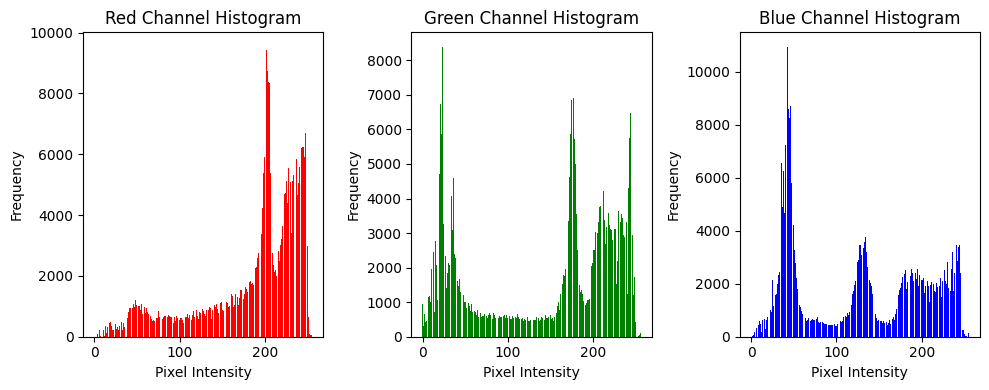

Mean pixel intensity for Red Channel: 186.29045937829721
Mean pixel intensity for Green Channel: 145.85141222303383
Mean pixel intensity for Blue Channel: 126.47516886255625
Red is the most dominant color.


In [ ]:
color_histogram(color_img)

# Task 4

Write a function that takes 3 parameters: a color image, a channel_number (0 for red, 1 for green and 2 for blue) and an enhancement value between 0 and 1, and returns an enhanced version of the image. Show the enhanced image. As an example, refer to the following image which shows the result for red enhancement.
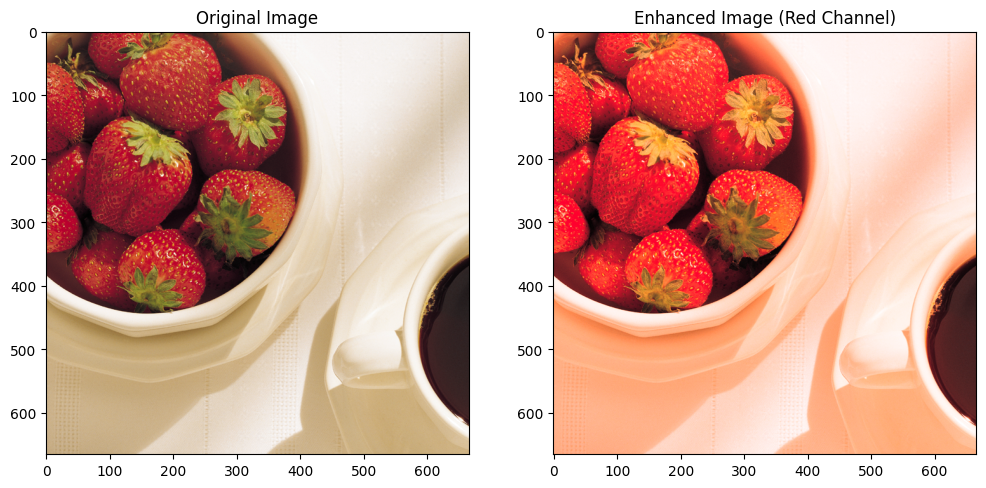

# **Description**
First, the color mode is checked to confirm the image is in RGB format, otherwise, it is converted. The image is then converted into a NumPy array to allow manipulation of its pixel values. A copy of the array is created for enhancement purposes. The specified color channel (based on the channel_number input: 0 for Red, 1 for Green, 2 for Blue) is enhanced by increasing its pixel values according to the given enhancement_val, using a formula that adjusts the pixel intensities. The modified array is converted back into an image. Finally, both the original and enhanced images are displayed side by side for comparison.

In [ ]:
def color_enhance(color_image, channel_number, enhancement_val):
  if color_image.mode != 'RGB':
      color_image = color_image.convert('RGB')

  image_array = np.array(color_image)

  enhanced_array = image_array.copy()

  enhanced_array[:, :, channel_number] = (
      enhanced_array[:, :, channel_number] + enhancement_val * (255 - enhanced_array[:, :, channel_number])
  ).astype(np.uint8)

  enhanced_image = Image.fromarray(enhanced_array)

  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title("Original Image")
  plt.imshow(color_image)

  plt.subplot(1, 2, 2)
  plt.title(f"Enhanced Channel {channel_number}")
  plt.imshow(enhanced_image)

  plt.show()



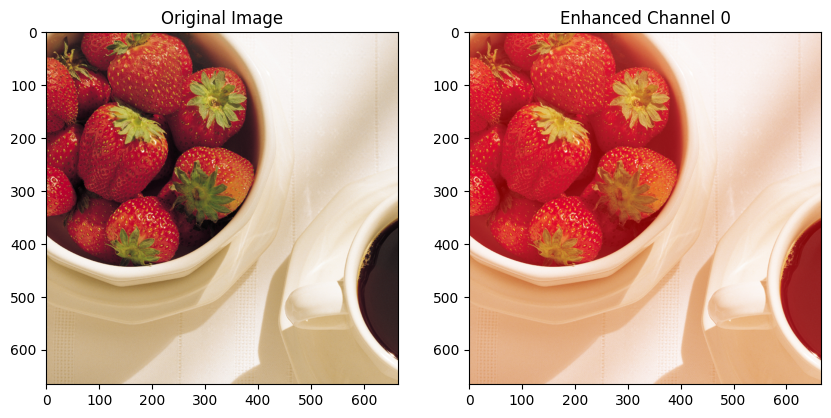

In [ ]:
color_enhance(color_img, 0, 0.5)

#Task 5

Write a function that takes a grayscale image as argument and returns the negative of that image. For an 8-bit image, it follows:

$$g(x,y) = L_{max} - f(x,y);$$
where $L_{max}=255$

# **Description**
First, the image is checked to ensure it's in grayscale mode, if not, it is converted. The grayscale image is then converted into a numpy array, where each pixel intensity ranges from 0 to 255. The inversion is performed by subtracting each pixel's intensity from 255 (the maximum grayscale value), effectively creating a negative of the image. The inverted array is converted back into an image format. Both the original and inverted grayscale images are displayed side by side for comparison.

In [ ]:
def invert_gray(gray_image):
    if gray_image.mode != 'L':
        gray_image = gray_image.convert('L')

    image_array = np.array(gray_image)

    Lmax = 255
    inverted_array = Lmax - image_array

    inverted_image = Image.fromarray(inverted_array.astype(np.uint8))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Grayscale Image")
    plt.imshow(gray_image, cmap='gray')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Inverted Grayscale Image")
    plt.imshow(inverted_image, cmap='gray')
    plt.axis("off")

    plt.show()

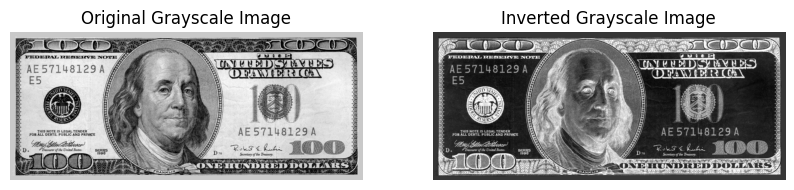

In [ ]:
invert_gray(gray_img)

#Task 6

Extend your function so that it works for color images too.

# **Description**
First, the color mode is checked to confirm that the image is in RGB format, if not, it is converted. The image is then converted into a numpy array, where each pixel's RGB values range from 0 to 255. The inversion is performed by subtracting each pixel's RGB values from 255, effectively creating a negative of the color image. The inverted array is converted back into an image format. Both the original and inverted color images are displayed side by side for comparison.

In [ ]:
def invert_color(color_image):
  if color_image.mode != 'RGB':
      color_image = color_image.convert('RGB')

  image_array = np.array(color_image)

  Lmax = 255

  inverted_array = Lmax - image_array

  inverted_image = Image.fromarray(inverted_array.astype(np.uint8))

  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title("Original Color Image")
  plt.imshow(color_image)


  plt.subplot(1, 2, 2)
  plt.title("Inverted Color Image")
  plt.imshow(inverted_image)

  plt.show()

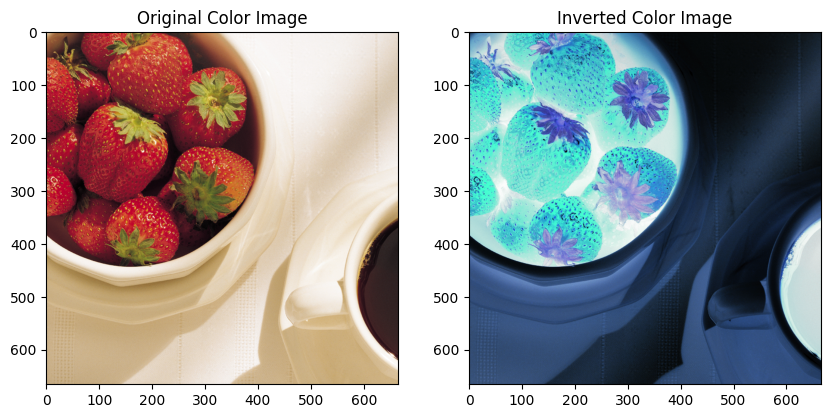

In [ ]:
invert_color(color_img)